# Projet_09 : Réalisez un traitement dans un environnement Big Data sur le Cloud

# 1 - Exploration du dataset :

Dans le cadre de ce projet, nous utiliserons un modèle du type `MobileNetV2` pré-entrainé, aussi nous utiliserons seulement le jeu de données de **Test**.

In [5]:
import os

PATH = '/data/Formation_OC/Projet_09'
PATH_Data = PATH+'/data/Test/'
print('PATH:        '+\
      PATH+'\nPATH_Data:   '+\
      PATH_Data)

PATH:        /data/Formation_OC/Projet_09
PATH_Data:   /data/Formation_OC/Projet_09/data/Test/


In [9]:
test_folder_list = os.listdir(PATH_Data)
print(f"Le dossier de Test est composé de {len(test_folder_list)} sous-dossiers.")
test_folder_list

Le dossier de Test est composé de 131 sous-dossiers.


['Kohlrabi',
 'Grape White 2',
 'Banana',
 'Avocado ripe',
 'Nectarine',
 'Corn',
 'Apple Red Yellow 2',
 'Pear Kaiser',
 'Tomato Yellow',
 'Pineapple Mini',
 'Cherry 2',
 'Peach Flat',
 'Apple Red Yellow 1',
 'Plum 2',
 'Cantaloupe 1',
 'Pear 2',
 'Plum 3',
 'Cherry 1',
 'Apple Red Delicious',
 'Rambutan',
 'Cucumber Ripe 2',
 'Clementine',
 'Tomato Cherry Red',
 'Pepper Green',
 'Pepper Orange',
 'Tomato 2',
 'Nectarine Flat',
 'Cantaloupe 2',
 'Banana Red',
 'Apple Crimson Snow',
 'Pear Stone',
 'Grape Blue',
 'Grapefruit Pink',
 'Apple Golden 1',
 'Apple Golden 2',
 'Tomato not Ripened',
 'Fig',
 'Grapefruit White',
 'Granadilla',
 'Physalis with Husk',
 'Tomato 4',
 'Pear Williams',
 'Salak',
 'Corn Husk',
 'Avocado',
 'Strawberry',
 'Ginger Root',
 'Pear Monster',
 'Pepper Yellow',
 'Cactus fruit',
 'Apple Braeburn',
 'Grape Pink',
 'Pepino',
 'Maracuja',
 'Cucumber Ripe',
 'Papaya',
 'Passion Fruit',
 'Pineapple',
 'Pomelo Sweetie',
 'Nut Pecan',
 'Kumquats',
 'Lemon Meyer',
 'P

In [12]:
img_folder_list = os.listdir(PATH_Data + test_folder_list[0])
print(f"Le sous-dossier contient {len(test_folder_list)} images.")
img_folder_list

Le sous-dossier contient 131 images.


['224_100.jpg',
 'r_146_100.jpg',
 'r_141_100.jpg',
 '226_100.jpg',
 '15_100.jpg',
 '235_100.jpg',
 'r_275_100.jpg',
 '229_100.jpg',
 '241_100.jpg',
 'r_148_100.jpg',
 'r_280_100.jpg',
 'r_302_100.jpg',
 'r_143_100.jpg',
 '31_100.jpg',
 '196_100.jpg',
 'r_10_100.jpg',
 '33_100.jpg',
 '36_100.jpg',
 '218_100.jpg',
 'r_268_100.jpg',
 'r_135_100.jpg',
 '9_100.jpg',
 'r_289_100.jpg',
 'r_269_100.jpg',
 '28_100.jpg',
 'r_285_100.jpg',
 'r_136_100.jpg',
 'r_130_100.jpg',
 '207_100.jpg',
 'r_134_100.jpg',
 '27_100.jpg',
 'r_128_100.jpg',
 'r_296_100.jpg',
 '199_100.jpg',
 '16_100.jpg',
 '244_100.jpg',
 'r_9_100.jpg',
 '29_100.jpg',
 '240_100.jpg',
 '47_100.jpg',
 'r_0_100.jpg',
 'r_12_100.jpg',
 'r_8_100.jpg',
 'r_6_100.jpg',
 '45_100.jpg',
 'r_145_100.jpg',
 '209_100.jpg',
 '236_100.jpg',
 '214_100.jpg',
 'r_277_100.jpg',
 'r_279_100.jpg',
 '223_100.jpg',
 '216_100.jpg',
 '231_100.jpg',
 'r_283_100.jpg',
 'r_164_100.jpg',
 'r_132_100.jpg',
 'r_301_100.jpg',
 'r_7_100.jpg',
 '51_100.jpg',
 '4

In [16]:
from pathlib import Path

path = Path(PATH_Data)

img_files = list(path.rglob('*.jpg'))
print(img_files[:5])

[PosixPath('/data/Formation_OC/Projet_09/data/Test/Kohlrabi/224_100.jpg'), PosixPath('/data/Formation_OC/Projet_09/data/Test/Kohlrabi/r_146_100.jpg'), PosixPath('/data/Formation_OC/Projet_09/data/Test/Kohlrabi/r_141_100.jpg'), PosixPath('/data/Formation_OC/Projet_09/data/Test/Kohlrabi/226_100.jpg'), PosixPath('/data/Formation_OC/Projet_09/data/Test/Kohlrabi/15_100.jpg')]


In [17]:
print(f"Le Dataset Test contient {len(img_files)} images au format *.jpg")

Le Dataset Test contient 22688 images au format *.jpg


---
---
# 2 - Stratégie de mise sur le Cloud :

### Sommaire :

1. Contexte et présentation du projet
2. Les contraintes du projet
3. Propositions de solutions
4. Mise en oeuvre

---
## 1 - Contexte et présentation du projet :

Dans le cadre d'une création d'une application qui permet aux utilisateurs d'obtenir des informations sur des fruits en les prenant en photo avec son téléphone, il nous incombe de déployer l'algorithme sur un environnement Big Data.  
Il nous faudra tout d'abord finaliser le script de traitement des données en Spark, établir une solution adéquate à une augmentation rapide du volume des données à traiter ainsi que le nombre d'utilisateurs.

---
## 2 - Les contraintes :

Pour ce projet il nous faut résoudre certaines contraintes techniques qui sont :
* L'algorithme doit tourner sur le Cloud
* Il faut prévoir et maitriser une rapide augmentation du volume de données à traiter
* Respecter les règles RGPD

---
## 3 - Choix techniques :

### 3.1 - Calcul distribué :

Afin de pouvoir palier à une rapide augmentation du volume de données à traiter, il est indispensable de réaliser du **calcul distribué**. Le choix logiciel se tourne vers `Apache Spark` qui est un Framework dédié à cet usage avec l'avantage de traiter les tâches **in-memory**.


**Spark :**  
Spark s'exécute en mode "maître/esclave", c’est-à-dire un master et un ou plusieurs workers.  
Il est constitué de 3 éléments principaux :  
* *Driver* : contient le coeur de l'application **SparkContext**, il divise le code en tâches et les distribue aux **workers**.
* *Cluster Manager* : il est responsable de l'allocation des ressources, nous utiliserons le gestionnaires de clusters : **YARN**
* *Workers* : les noeuds de calcul. Ils sont responsable de l'exécution des tâches distribuées.

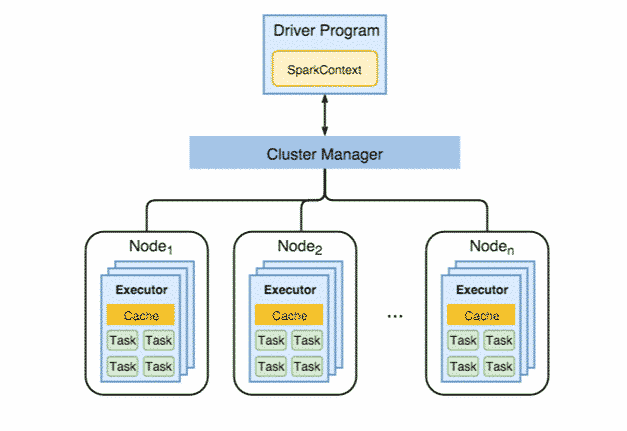

**Spark** utilise des RDD (Resilient Distributed Datasets), cela garantit la tolérance aux pannes, si une tâche échoue Spark peut rejouer la tâche sur une autre machine grâce à l'historique des transformations.

On peut lancer un traitement Spark sous deux modes d’exécution :

* Mode client : le driver est créé dans la machine qui soumet l’application (machine locale ou machine qui héberge le master)
* Mode cluster : le driver est créé à l’intérieur du cluster (dans une machine worker).


---
### 3.2 - Classification : Transfer Learning :

Dans ce projet, le modèle de classification des images de fruits que nous utiliserons est un modèle pré-entraîné : `MobileNetV2`. Nous allons adapter ce modèle en récupérant l'avant dernière couche afin d'obtenir un vecteur réduit de dimension : (1,1,1280).

**MobileNetV2** :  est un réseau de neurones convolutif (CNN) optimisé pour les appareils mobiles et embarqués, offrant un bon équilibre entre précision et vitesse.

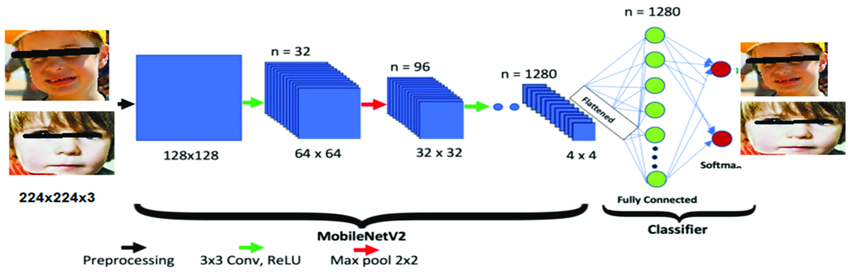

---
### 3.3 - Architecture Cloud : 

Afin d'utiliser le calcul distribué sur le Cloud, il nous faut un environnement Big Data, le choix du prestataire se tourne vers le Cloud d'amazon **AWS**, le service **EMR** (Elastic MapReduce).

**PAAS** : <u>Platform As A Service</u>

Amazon EMR (Elastic MapReduce) est une solution gérée pour le traitement massif de données en utilisant l'outil Spark dans ce projet.  
EMR est conçu pour traiter rapidement de grandes quantités de données sur des clusters de machines EC2.  

**Avantages :**  
* Un environnement Spark pré-installé à la demande
* Avec l'utilisation de l'auto-scaling, la mise à l'échelle se fera horizontalement et automatiquement par l'EMR, suivant les sollicitations.
* Facilité de mise en oeuvre 

---

**Architecture testée dans ce projet :**

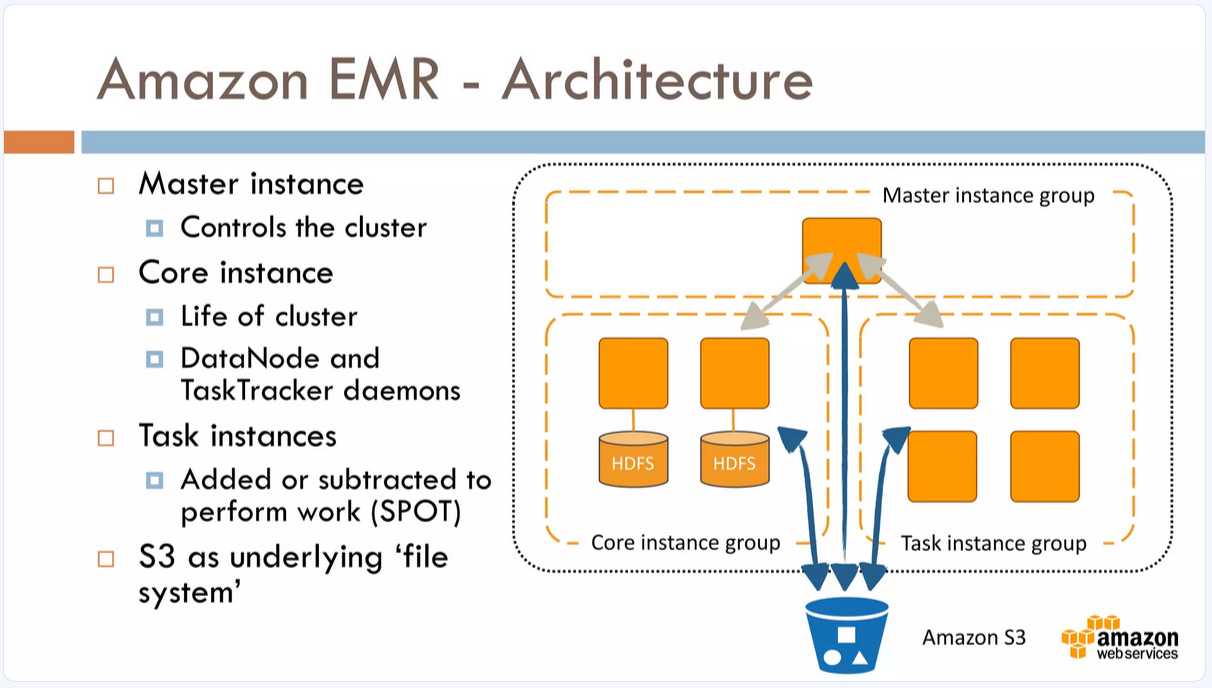

EMR repose sur trois groupes d'instances  principaux :
* Master instance group : 1 instance **Primaire** (m5.xlarge)
    * Contrôle l'ensemble du cluster
    * Héberge le **Spark Driver**
    * Héberge le **Cluster manager (YARN)**
    * Supervise le stockage HDFS
* Core instance group : 3 instances **Principal** (m5.xlarge)
    * Exécute les tâches de calcul et gère le stockage local HDFS
* Task instance group : 13 instances **Tâche** ON_DEMAND (m5.xlarge)
    * Exécute uniquement les tâches de calcul
    * A la demande, programmé pour ajouter des instances automatiquement selon les besoin

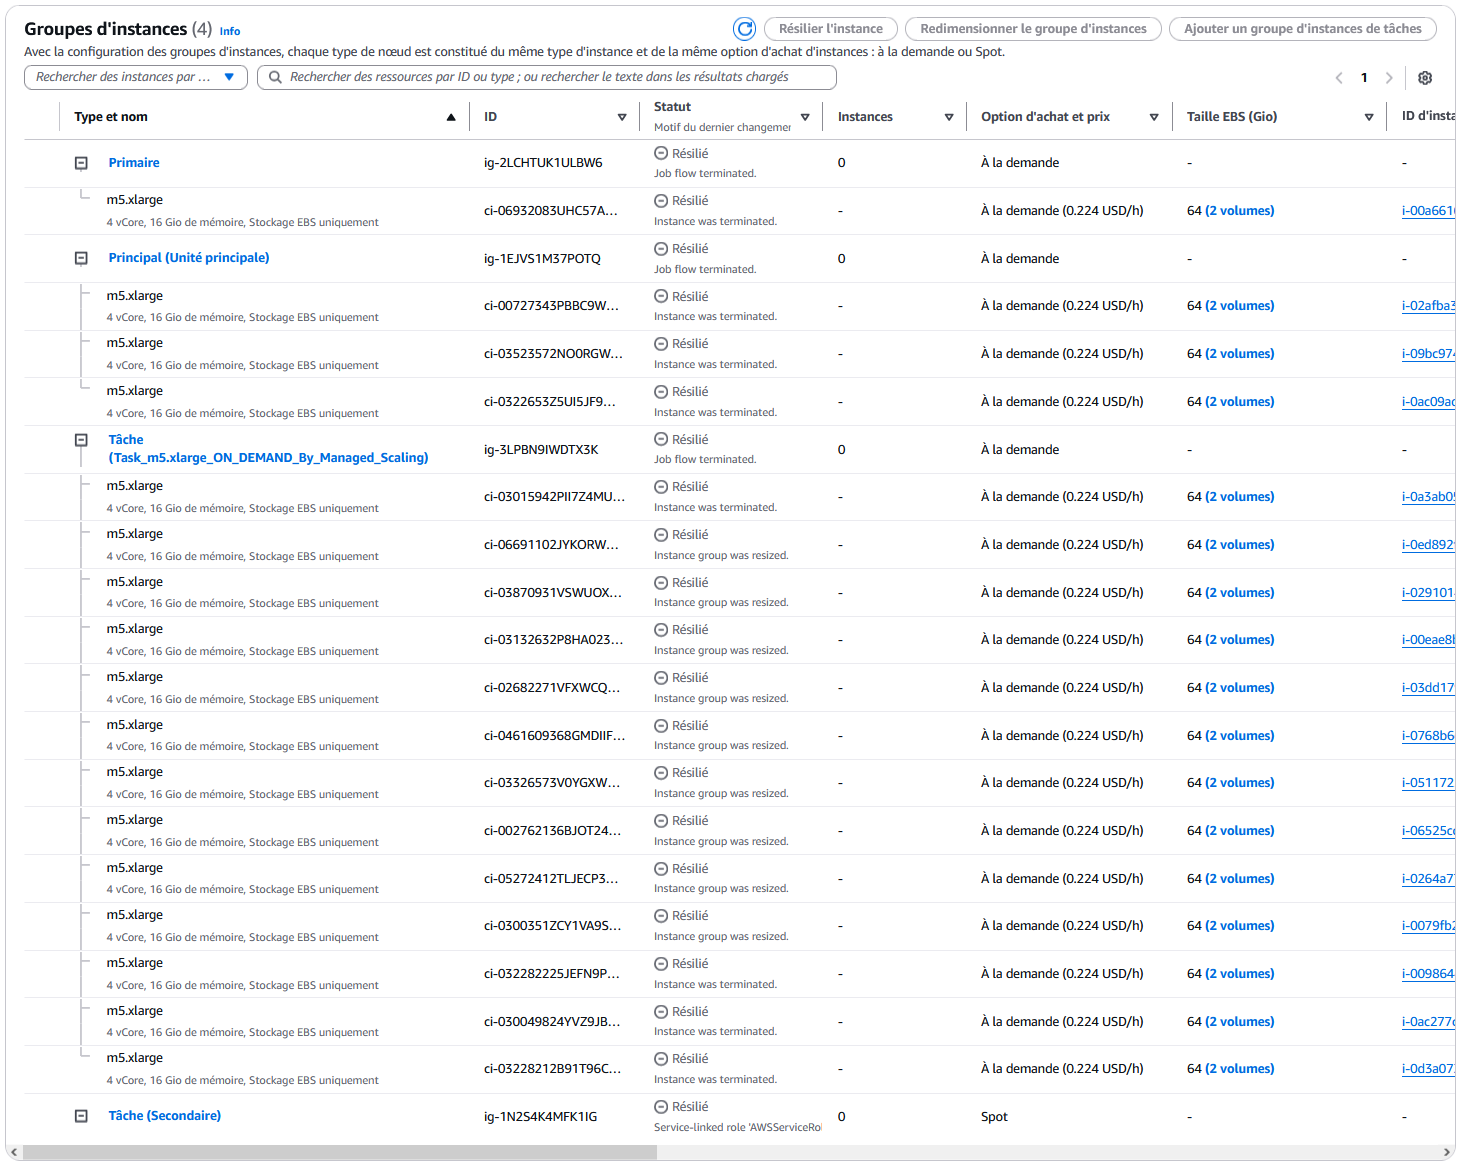

A la création de l'EMR, l'option de mise à l'échelle du cluster est passée en "gérée par EMR", avec au minimum 4 instances (1 Master + 3 Principal), et un maximum de 50 instances **à la demande** en cas de besoin.

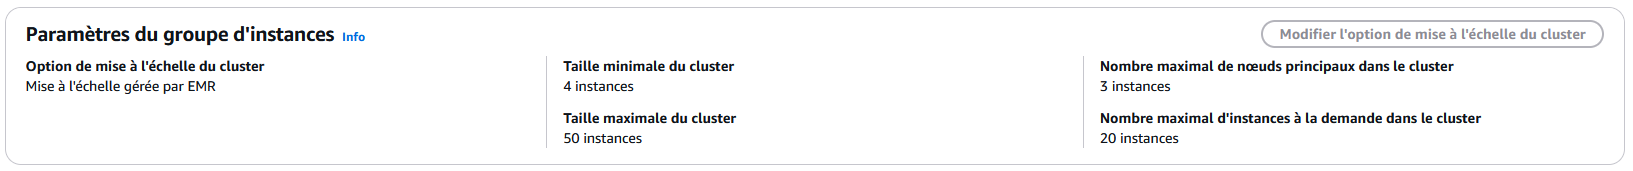

---
### 3.4 - Stockage :

<u>**Stockage persistent :**</u>  
Le stockage persistent a été établi dans un Bucket **S3**, qui comporte :
* bootrap-env.sh : fichier de config d'installation du EC2 Master
* jupyter : dossier contenant les Notebooks du projet
* logs : dossier des logs de l'EMR (emplacement défini à la crétion de l'EMR)
* model : dossier contenant une sauvegarde du modèle final
* Results : dossier contenant les fichiers de sorties au format **parquet**
* Test : dossier d'images utilisées pour les essais

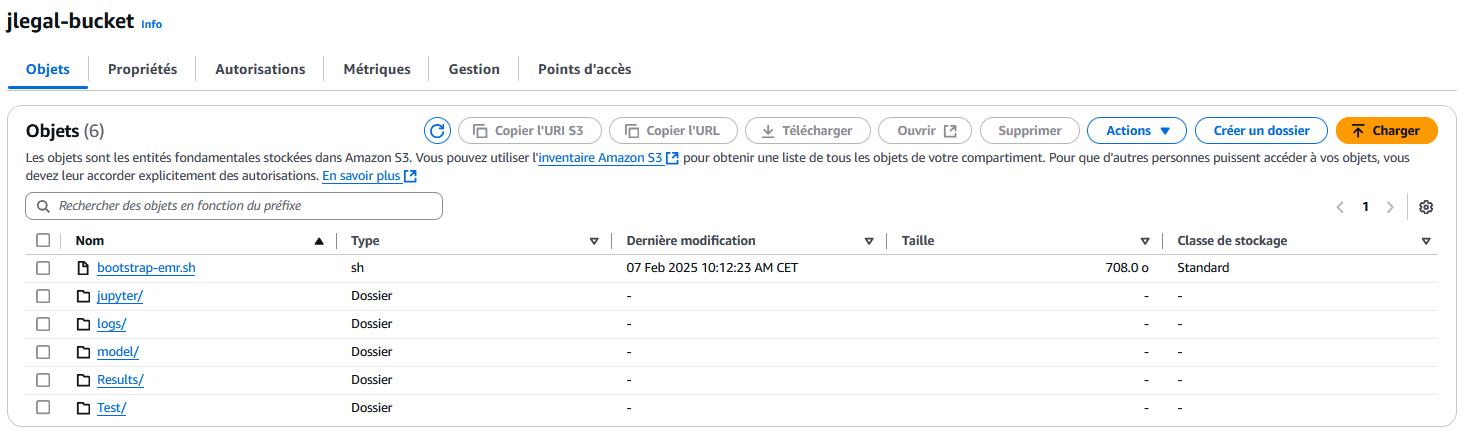

<u>**Stockage EBS :**</u>  
Chaque instance EC2 possède un stockage **EBS (Elastic Block Store)**, qui est un stockage local attaché à l'instance.  
La valeur de 64Go par instance a été laissée ainsi, par défaut.

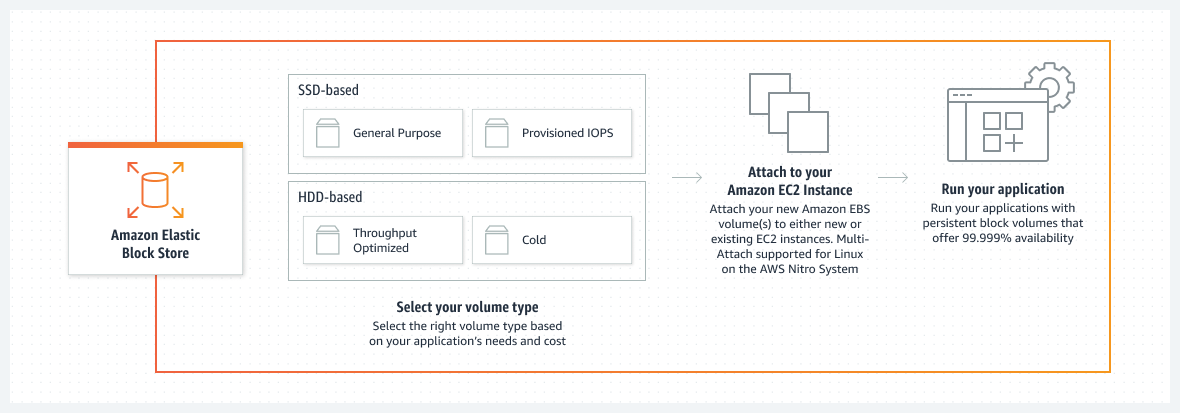

<u>**Stockage HDFS :**</u>  (Hadoop Distributed File System)    
C’est une couche logicielle qui divise les données en blocs et les stocke sur les volumes EBS des différentes instances Core.  
Cela crée un système de fichiers distribué qui combine l’espace disponible sur plusieurs instances pour stocker des fichiers massifs.
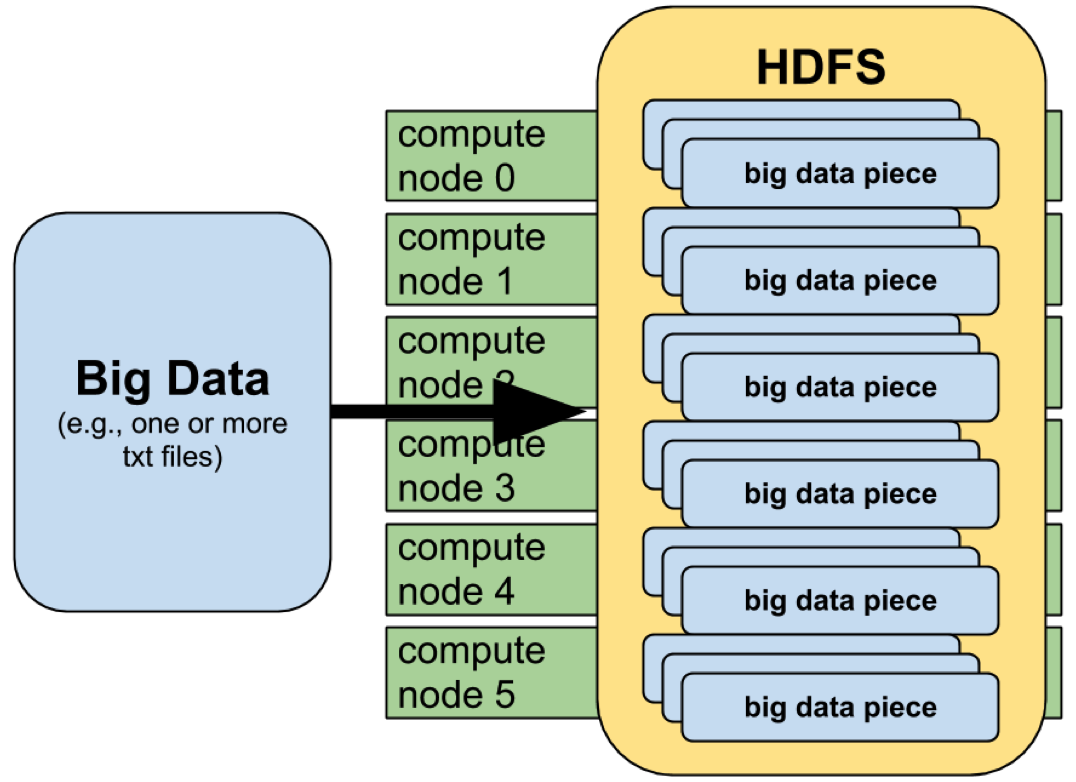

---
---
## 4 - Respect des principes RGPD :

1. <u>Finalité</u> : Les images traitées sont utilisées dans l'algorithme afin d'être classifiée.

2. <u>Transparence</u> : Les informations relatives à l'envoi d'images sur l'application seront explicitement décrites à l'installation de cette dernière. 

3. <u>Minimisation</u> : Seules les images sont récupérées, aucune informations liées aux clients n'est récupérées.

4. <u>Sécurité et confidentialité</u> : Aucunes informations personnelles n'est récupérées.

5. <u>Conservation</u> : Données ne sont pas conservées, les images sont supprimées suite à la classification.